In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sample_data.csv',encoding='utf-8-sig')
data

,title,created_date,recommendation,content
0,"프랙스 파이낸스, 노블과 협력해 코스모스 생태계로 토큰 확장",2024-04-04 10:40:00,7,프랙스 파이낸스와 노블의 협력으로 코스모스 생태계에 새로운 기회가 열렸다. 이제 프...
1,지난 7일간 글로벌 암호화폐 시가총액 3.61% 감소,2024-04-04 10:30:00,6,플랫폼 샌티멘트(Santiment)가 공식 X를 통해 “지난 7일간 글로벌 암호화폐...
2,"아이겐레이어 AVS 가스프, 8,000만 달러의 토큰 가치로 자금 모집",2024-04-04 10:50:00,8,망가타 파이낸스의 크로스체인 스왑 프로토콜 Gasp가 전략적으로 움직여 브랜드를 변...
3,3월 암호화폐 현물 거래 '3330조원'...전월比 두 배,2024-04-04 10:43:00,11,3월 중앙화 암호화폐 거래소의 월간 현물 거래량이 전월 대비 두 배 이상 증가하며 ...
4,"쿠코인, 미국 당국 기소에 12억 달러 자금 유출…시장 점유율 절반",2024-04-04 11:03:00,10,"미국 법무부와 상품선물거래위원회의 기소에 따라 쿠코인이 큰 타격을 입었으며, 일일 ..."
...,...,...,...,...
995,"바이비트, FOXY 현물 거래페어 상장",2024-04-11 18:10:00,8,바이비트가 공식 홈페이지를 통해 12일 17시(한국시간) FOXY 현물 거래 페어를...
996,"윈터뮤트 추정 주소, 바이낸스서 $240만 ANKR 출금",2024-04-11 18:11:00,8,"블록체인 분석업체 스코프스캔이 X를 통해 ""윈터뮤트 추정 주소가 1시간 전 바이낸스..."
997,"분석 ""비트코인 현물 ETF 출시 후, 미 CPI가 BTC 가격에 가장 큰 영향""",2024-04-11 18:21:00,7,"비트코인 현물 ETF 출시 이후, BTC 가격에 가장 큰 영향을 주는 것은 미국 소..."
998,"에브리월드, 15일 EVERY 토큰 에어드랍 예정",2024-04-11 18:24:00,0,"비트코인닷컴에 따르면, 코인베이스와 a16z가 투자자로 있는 웹3 광고 프로토콜 에..."


In [3]:
import re
from konlpy.tag import Okt

# 한글 및 공백을 제외하고 모든 문자를 제거
data['cleaned_content'] = data['content'].apply(lambda x: re.sub(r'[^가-힣\s]', '', x))

# Okt 형태소 분석기를 초기화
okt = Okt()

# 토큰화 및 불용어 제거
stopwords = ['에서', '으로', '하다', '에는', '등', '이다', '과', '와', '을', '를', '의', '에', '가', '이', '은', '는']

data['tokenized_content'] = data['cleaned_content'].apply(lambda x: [word for word in okt.nouns(x) if word not in stopwords and len(word) > 1])
# 결과 확인
data[['cleaned_content', 'tokenized_content']].head()


,cleaned_content,tokenized_content
0,프랙스 파이낸스와 노블의 협력으로 코스모스 생태계에 새로운 기회가 열렸다 이제 프랙...,"[프랙스, 파이낸스, 노블, 협력, 코스모스, 생태계, 기회, 이제, 프랙스, 토큰..."
1,플랫폼 샌티멘트가 공식 를 통해 지난 일간 글로벌 암호화폐 시가총액과 거래량이 각각...,"[플랫폼, 샌티, 멘트, 공식, 통해, 지난, 일간, 글로벌, 암호화폐, 시가총액,..."
2,망가타 파이낸스의 크로스체인 스왑 프로토콜 가 전략적으로 움직여 브랜드를 변경하고 ...,"[가타, 파이낸스, 크로스체인, 스왑, 프로토콜, 전략, 브랜드, 변경, 백만, 달..."
3,월 중앙화 암호화폐 거래소의 월간 현물 거래량이 전월 대비 두 배 이상 증가하며 약...,"[중앙, 암호화폐, 거래소, 월간, 현물, 거래량, 전월, 대비, 이상, 증가, 조..."
4,미국 법무부와 상품선물거래위원회의 기소에 따라 쿠코인이 큰 타격을 입었으며 일일 거...,"[미국, 법무부, 상품, 선물거래, 위원회, 기소, 쿠코인, 타격, 일일, 거래량,..."


In [4]:
data.to_parquet('tokenized_data.parquet',index=False)

In [3]:
data = pd.read_parquet('tokenized_data.parquet')
data

,title,created_date,recommendation,content,cleaned_content,tokenized_content
0,"프랙스 파이낸스, 노블과 협력해 코스모스 생태계로 토큰 확장",2024-04-04 10:40:00,7,프랙스 파이낸스와 노블의 협력으로 코스모스 생태계에 새로운 기회가 열렸다. 이제 프...,프랙스 파이낸스와 노블의 협력으로 코스모스 생태계에 새로운 기회가 열렸다 이제 프랙...,"[프랙스, 파이낸스, 노블, 협력, 코스모스, 생태계, 기회, 이제, 프랙스, 토큰..."
1,지난 7일간 글로벌 암호화폐 시가총액 3.61% 감소,2024-04-04 10:30:00,6,플랫폼 샌티멘트(Santiment)가 공식 X를 통해 “지난 7일간 글로벌 암호화폐...,플랫폼 샌티멘트가 공식 를 통해 지난 일간 글로벌 암호화폐 시가총액과 거래량이 각각...,"[플랫폼, 샌티, 멘트, 공식, 통해, 지난, 일간, 글로벌, 암호화폐, 시가총액,..."
2,"아이겐레이어 AVS 가스프, 8,000만 달러의 토큰 가치로 자금 모집",2024-04-04 10:50:00,8,망가타 파이낸스의 크로스체인 스왑 프로토콜 Gasp가 전략적으로 움직여 브랜드를 변...,망가타 파이낸스의 크로스체인 스왑 프로토콜 가 전략적으로 움직여 브랜드를 변경하고 ...,"[가타, 파이낸스, 크로스체인, 스왑, 프로토콜, 전략, 브랜드, 변경, 백만, 달..."
3,3월 암호화폐 현물 거래 '3330조원'...전월比 두 배,2024-04-04 10:43:00,11,3월 중앙화 암호화폐 거래소의 월간 현물 거래량이 전월 대비 두 배 이상 증가하며 ...,월 중앙화 암호화폐 거래소의 월간 현물 거래량이 전월 대비 두 배 이상 증가하며 약...,"[중앙, 암호화폐, 거래소, 월간, 현물, 거래량, 전월, 대비, 이상, 증가, 조..."
4,"쿠코인, 미국 당국 기소에 12억 달러 자금 유출…시장 점유율 절반",2024-04-04 11:03:00,10,"미국 법무부와 상품선물거래위원회의 기소에 따라 쿠코인이 큰 타격을 입었으며, 일일 ...",미국 법무부와 상품선물거래위원회의 기소에 따라 쿠코인이 큰 타격을 입었으며 일일 거...,"[미국, 법무부, 상품, 선물거래, 위원회, 기소, 쿠코인, 타격, 일일, 거래량,..."
...,...,...,...,...,...,...
995,"바이비트, FOXY 현물 거래페어 상장",2024-04-11 18:10:00,8,바이비트가 공식 홈페이지를 통해 12일 17시(한국시간) FOXY 현물 거래 페어를...,바이비트가 공식 홈페이지를 통해 일 시한국시간 현물 거래 페어를 상장한다고 공지했...,"[바이, 비트, 공식, 홈페이지, 통해, 한국, 시간, 현물, 거래, 페어, 상장,..."
996,"윈터뮤트 추정 주소, 바이낸스서 $240만 ANKR 출금",2024-04-11 18:11:00,8,"블록체인 분석업체 스코프스캔이 X를 통해 ""윈터뮤트 추정 주소가 1시간 전 바이낸스...",블록체인 분석업체 스코프스캔이 를 통해 윈터뮤트 추정 주소가 시간 전 바이낸스에서 ...,"[블록체인, 분석, 업체, 스코프, 스캔, 통해, 윈터, 뮤트, 추정, 주소, 시간..."
997,"분석 ""비트코인 현물 ETF 출시 후, 미 CPI가 BTC 가격에 가장 큰 영향""",2024-04-11 18:21:00,7,"비트코인 현물 ETF 출시 이후, BTC 가격에 가장 큰 영향을 주는 것은 미국 소...",비트코인 현물 출시 이후 가격에 가장 큰 영향을 주는 것은 미국 소비자물가지수였...,"[비트코인, 현물, 출시, 이후, 가격, 가장, 영향, 미국, 소비자, 물가, 지수..."
998,"에브리월드, 15일 EVERY 토큰 에어드랍 예정",2024-04-11 18:24:00,0,"비트코인닷컴에 따르면, 코인베이스와 a16z가 투자자로 있는 웹3 광고 프로토콜 에...",비트코인닷컴에 따르면 코인베이스와 가 투자자로 있는 웹 광고 프로토콜 에브리월드가 ...,"[비트코인, 코인, 베이스, 투자자, 광고, 프로토콜, 에브리, 월드, 커뮤니티, ..."


In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 폰트 매니저를 통해 시스템 폰트 중에서 Pretendard 검색
path = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
pretendard_path = [f for f in path if 'Pretendard' in f]

if pretendard_path:
    plt.rc('font', family=font_manager.FontProperties(fname=pretendard_path[0]).get_name())
else:
    print('Pretendard 폰트가 시스템에 설치되어 있지 않습니다.')


In [5]:
import matplotlib.font_manager as font_manager

# 사용 가능한 폰트 목록을 가져오는 함수
fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 목록에서 폰트 이름을 추출
font_names = [font_manager.FontProperties(fname=font).get_name() for font in fonts]

# 폰트 이름 출력
unique_font_names = set(font_names)  # 중복을 제거하여 출력
print("사용 가능한 폰트 리스트:")
for name in sorted(unique_font_names):
    print(name)


C:\Users\User\AppData\Local\Temp\ipykernel_6356\944698966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Counts', y='Words', data=df, palette='viridis')  # 색상 팔레트 변경
c:\GitHub\URAILAB\.conda\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\GitHub\URAILAB\.conda\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\GitHub\URAILAB\.conda\Lib\site-packages\seaborn\_base

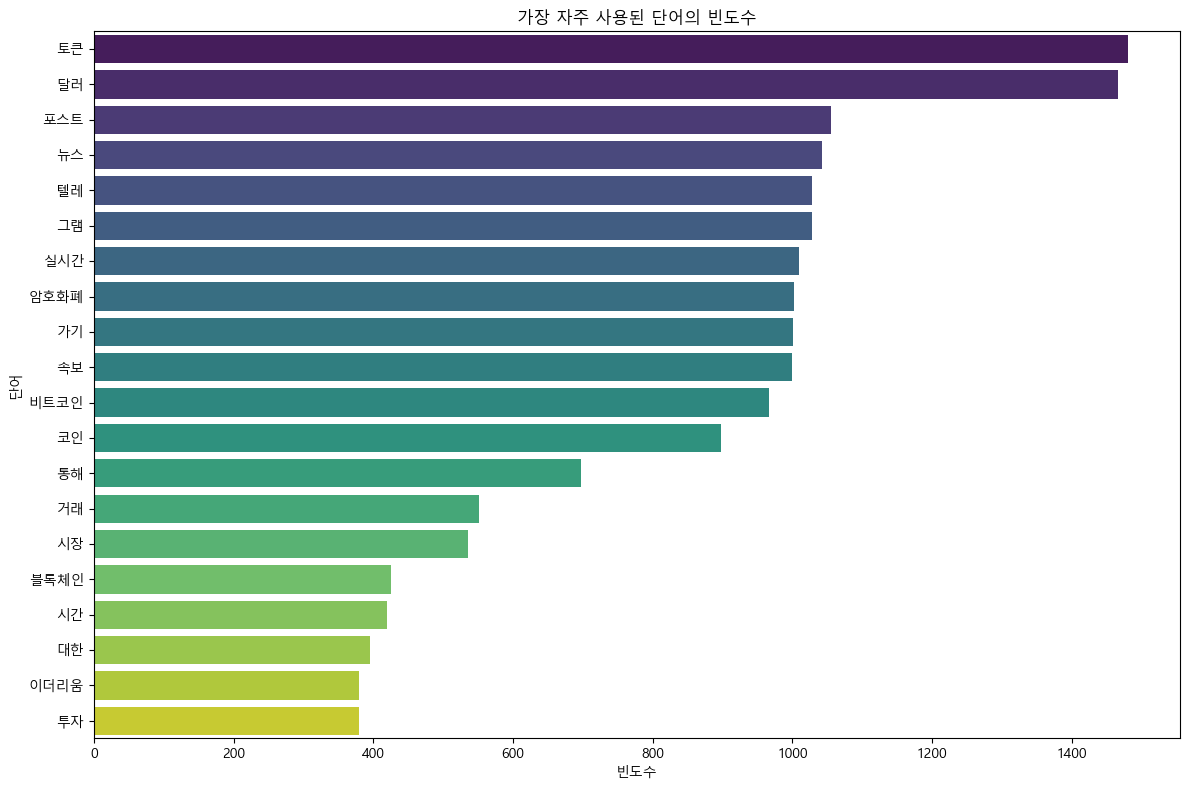

In [6]:
from matplotlib.font_manager import FontProperties
import seaborn as sns  # Seaborn 라이브러리 추가
font_prop = FontProperties(family='Pretendard')
# 빈도 분석을 위한 전체 텍스트 풀 생성
all_words = [word for sublist in data['tokenized_content'] for word in sublist]
word_counts = Counter(all_words)

# 가장 빈번한 단어 추출 및 시각화
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)
df = pd.DataFrame({'Words': words, 'Counts': counts})
plt.figure(figsize=(12, 8))
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
sns.barplot(x='Counts', y='Words', data=df, palette='viridis')  # 색상 팔레트 변경
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('가장 자주 사용된 단어의 빈도수')
plt.tight_layout()
plt.show()

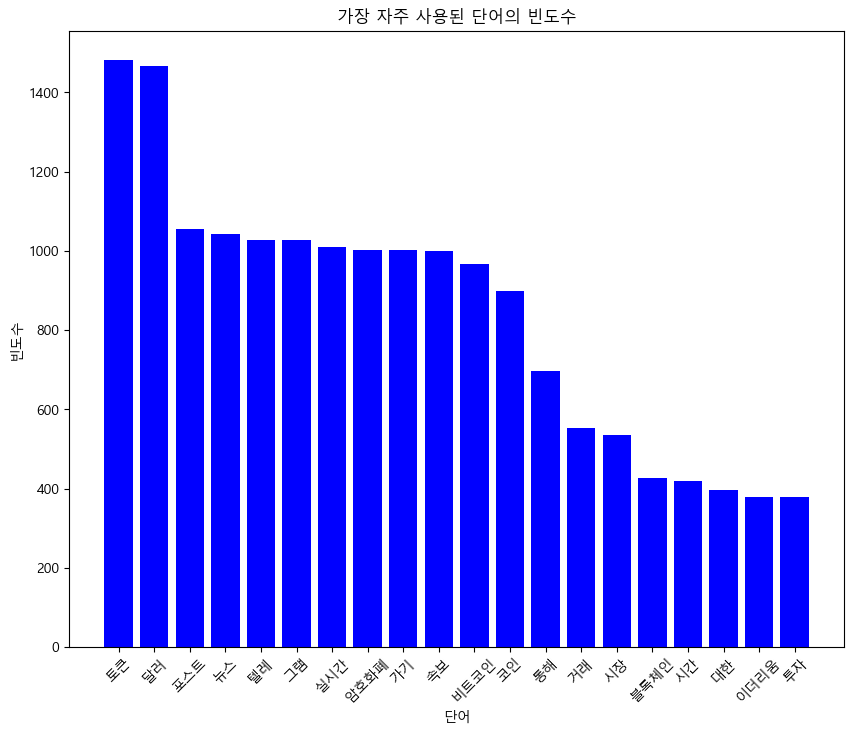

In [7]:

# 빈도 분석을 위한 전체 텍스트 풀 생성

all_words = [word for sublist in data['tokenized_content'] for word in sublist]
word_counts = Counter(all_words)
# # 가장 빈번한 10개 단어 추출
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)  # 단어와 빈도수 분리
plt.rc('font', family='Malgun Gothic')
# 막대 그래프로 시각화
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='blue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('가장 자주 사용된 단어의 빈도수')
plt.xticks(rotation=45)
plt.show()


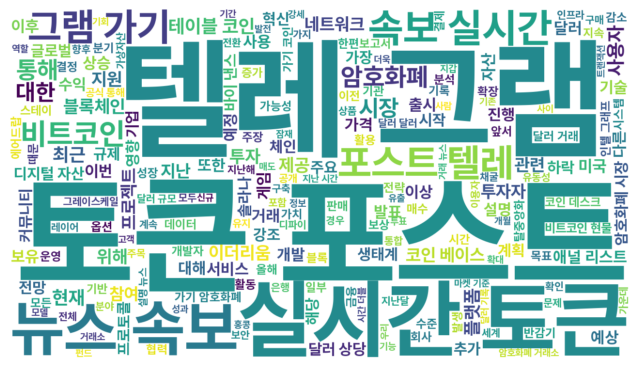

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 전체 텍스트 풀을 문자열로 변환
text = ' '.join(all_words)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(font_path='path/Pretendard-Bold.ttf', 
                      width=1280, height=720, 
                      background_color='white').generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 표시 제거
plt.show()


In [11]:
from textblob import TextBlob

# 간단한 감정 분석 함수 정의
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# 원문 데이터에 감정 분석 적용
data['sentiment'] = data['content'].apply(analyze_sentiment)

# 결과 확인
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)


sentiment
Neutral     975
Negative     14
Positive     11
Name: count, dtype: int64


In [12]:
from gensim import corpora, models
import gensim

# 토큰화된 데이터를 사전(dictionary)과 말뭉치(corpus)로 변환
dictionary = corpora.Dictionary(data['tokenized_content'])
corpus = [dictionary.doc2bow(text) for text in data['tokenized_content']]

# LDA 모델 생성 및 훈련
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=15)

# 토픽과 그에 따른 단어들을 출력
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.010*"사용자" + 0.009*"토큰" + 0.009*"제공" + 0.008*"게임" + 0.007*"프로젝트"')
(1, '0.020*"토큰" + 0.013*"그램" + 0.013*"텔레" + 0.013*"포스트" + 0.013*"뉴스"')
(2, '0.033*"달러" + 0.024*"비트코인" + 0.016*"토큰" + 0.015*"암호화폐" + 0.014*"코인"')
(3, '0.012*"토큰" + 0.011*"투자" + 0.009*"달러" + 0.008*"블록체인" + 0.008*"실시간"')
(4, '0.017*"토큰" + 0.014*"뉴스" + 0.014*"통해" + 0.014*"텔레" + 0.014*"그램"')


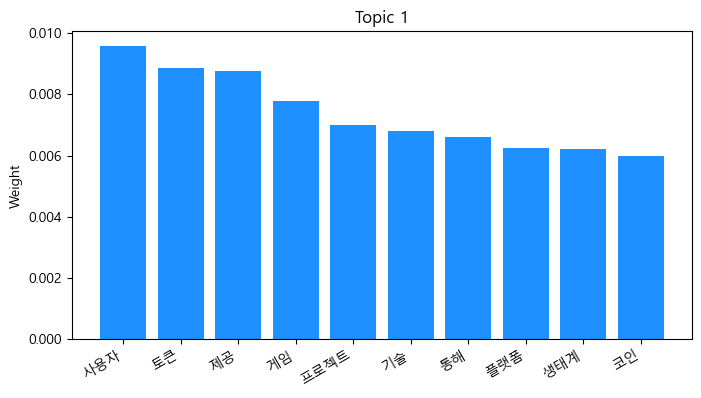

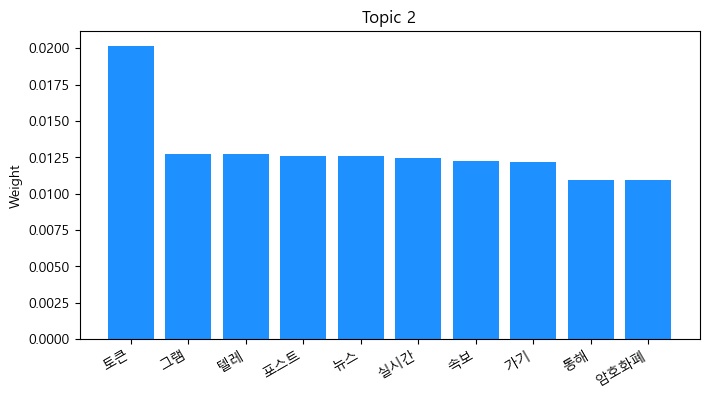

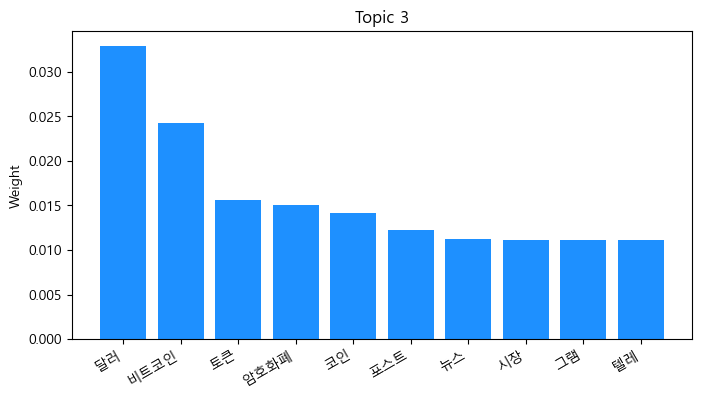

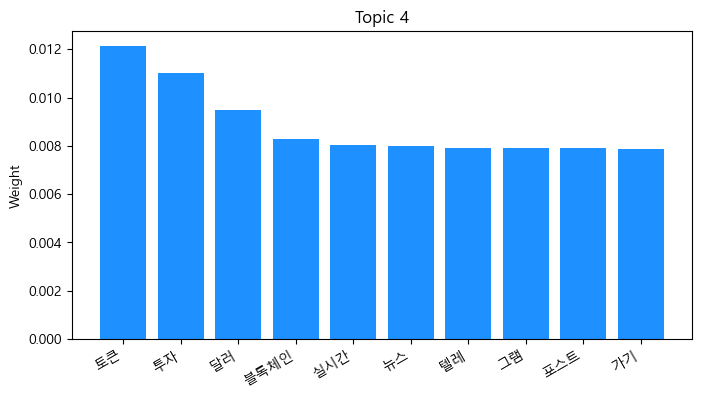

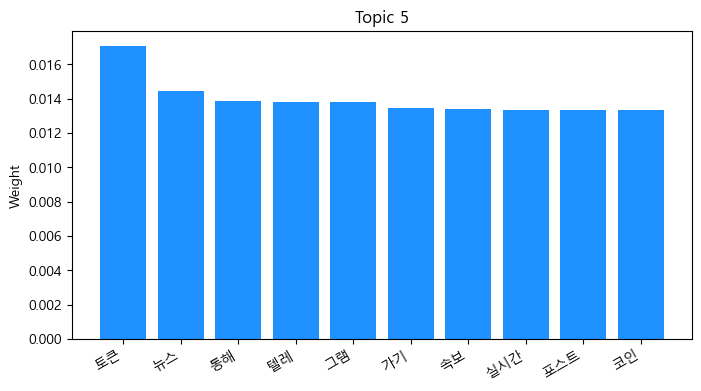

In [13]:
import matplotlib.pyplot as plt

# 토픽 모델링 결과를 시각화하는 함수
def plot_top_words(lda_model, nb_topics):
    for i in range(nb_topics):
        plt.figure(figsize=(8, 4))
        topic_words = dict(lda_model.show_topic(i, 10))
        plt.bar(range(len(topic_words)), list(topic_words.values()), align='center', color='dodgerblue')
        plt.xticks(range(len(topic_words)), list(topic_words.keys()), rotation=30, ha='right')
        plt.title(f'Topic {i+1}')
        plt.ylabel('Weight')
        plt.show()

# 모델과 토픽 수를 함수에 전달
plot_top_words(ldamodel, 5)


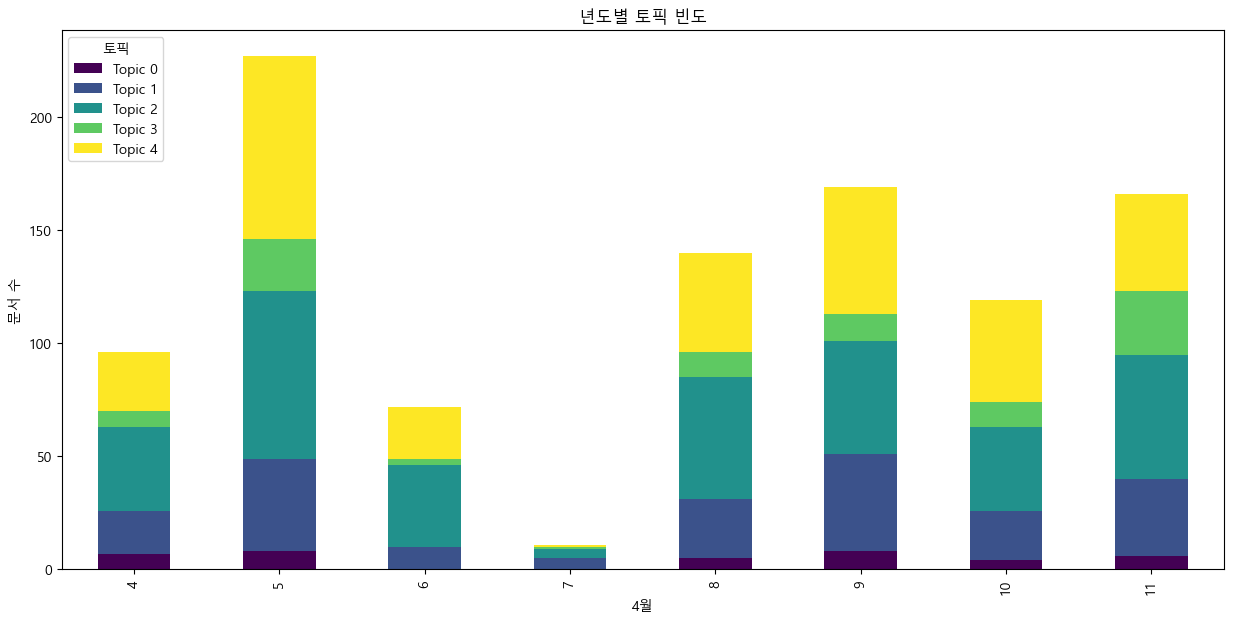

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 'created_date' 열을 datetime 타입으로 변환합니다.
data['created_date'] = pd.to_datetime(data['created_date'])

# 각 문서의 주요 토픽을 결정합니다.
# 각 문서에 대해 가장 높은 확률을 가진 토픽을 할당합니다.
data['main_topic'] = [max(ldamodel[doc], key=lambda x: x[1])[0] for doc in corpus]

# 시간에 따른 토픽의 빈도를 계산합니다.
topic_over_time = data.groupby([data['created_date'].dt.day, 'main_topic']).size().unstack().fillna(0)

# 년도별 토픽 빈도를 시각화합니다.
topic_over_time.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')
plt.title('년도별 토픽 빈도')
plt.ylabel('문서 수')
plt.xlabel('4월')
plt.legend(title='토픽', loc='upper left', labels=[f'Topic {i}' for i in range(topic_over_time.shape[1])])
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6356\1243433550.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_topic', y='recommendation', data=topic_recommendation, palette='coolwarm')
c:\GitHub\URAILAB\.conda\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\GitHub\URAILAB\.conda\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\GitHub\URAILAB\.conda\Lib\site-pac

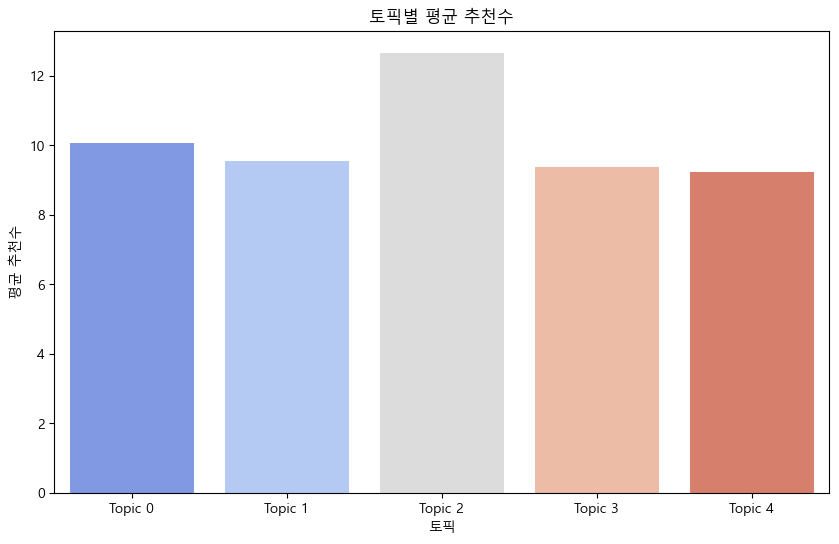

In [18]:
import seaborn as sns

# 주요 토픽과 추천수 간의 관계를 보기 위해 평균 추천수를 계산합니다.
topic_recommendation = data.groupby('main_topic')['recommendation'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='main_topic', y='recommendation', data=topic_recommendation, palette='coolwarm')
plt.title('토픽별 평균 추천수')
plt.xlabel('토픽')
plt.ylabel('평균 추천수')
plt.xticks(range(len(topic_recommendation['main_topic'])), [f'Topic {i}' for i in topic_recommendation['main_topic']])
plt.show()


In [19]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 준비된 LDA 모델과 말뭉치, 사전을 이용하여 시각화 데이터를 준비합니다.
vis_data = gensimvis.prepare(ldamodel, corpus, dictionary)

# 시각화를 위한 HTML 파일을 생성합니다.
pyLDAvis.display(vis_data)


In [14]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import ast

# 데이터 불러오기
data = pd.read_parquet('tokenized_data.parquet')


In [12]:

# tokenized_content 열이 문자열로 저장된 리스트인 경우 리스트로 변환
# 예시 데이터의 첫 번째 항목으로 확인
print("원본 데이터:", data['tokenized_content'].iloc[0])

# 문자열을 실제 리스트로 변환
data['tokenized_content'] = data['tokenized_content'].apply(ast.literal_eval)

# 변환 후 데이터 확인
print("변환된 데이터:", data['tokenized_content'].iloc[0])


원본 데이터: ['프랙스' '파이낸스' '노블' '협력' '코스모스' '생태계' '기회' '이제' '프랙스' '토큰' '코스모스' '네트워크'
 '이상' '블록체인' '연결' '작동' '시간' '더블' '프랙스' '파이낸스' '노블' '협력' '코스모스' '생태계' '날개'
 '협력' '통해' '프랙스' '토큰' '이제' '코스모스' '네트워크' '이상' '상호' '연결' '블록체인' '포함' '작동'
 '토큰' '탈중앙화' '금융' '결제' '용도' '사용' '또한' '프랙스' '달러' '이상' '가치' '고정' '이더리움'
 '자산' '이더리움' '프로젝트' '코스모스' '진출' '브리지' '버전' '프랙스' '담보' '알고리즘' '조합' '덕분'
 '안정' '유지' '테이블' '코인' '프랙스' '토큰' '제공' '다음' '스테이' '수익' '프랙스' '버전' '노블'
 '코스모스' '생태계' '서클' '테이블' '코인' '탄생' '플랫폼' '이제' '범위' '오스' '시스' '셀레스티아' '세이'
 '인젝티브' '뉴트론' '다른' '코스모스' '체인' '확장' '출시' '이후' '현재' '코스모스' '세계' '달러' '상당'
 '프랙스' '생태계' '직접' '통합' '사용자' '개발자' '모두' '기회' '다른' '뉴스' '속보' '실시간' '토큰'
 '포스트' '텔레' '그램' '가기']


ValueError: malformed node or string: array(['프랙스', '파이낸스', '노블', '협력', '코스모스', '생태계', '기회', '이제', '프랙스', '토큰',
       '코스모스', '네트워크', '이상', '블록체인', '연결', '작동', '시간', '더블', '프랙스',
       '파이낸스', '노블', '협력', '코스모스', '생태계', '날개', '협력', '통해', '프랙스', '토큰',
       '이제', '코스모스', '네트워크', '이상', '상호', '연결', '블록체인', '포함', '작동', '토큰',
       '탈중앙화', '금융', '결제', '용도', '사용', '또한', '프랙스', '달러', '이상', '가치',
       '고정', '이더리움', '자산', '이더리움', '프로젝트', '코스모스', '진출', '브리지', '버전',
       '프랙스', '담보', '알고리즘', '조합', '덕분', '안정', '유지', '테이블', '코인', '프랙스',
       '토큰', '제공', '다음', '스테이', '수익', '프랙스', '버전', '노블', '코스모스', '생태계',
       '서클', '테이블', '코인', '탄생', '플랫폼', '이제', '범위', '오스', '시스', '셀레스티아',
       '세이', '인젝티브', '뉴트론', '다른', '코스모스', '체인', '확장', '출시', '이후', '현재',
       '코스모스', '세계', '달러', '상당', '프랙스', '생태계', '직접', '통합', '사용자', '개발자',
       '모두', '기회', '다른', '뉴스', '속보', '실시간', '토큰', '포스트', '텔레', '그램', '가기'],
      dtype=object)

In [18]:
import pandas as pd

# 데이터 불러오기
data = pd.read_parquet('tokenized_data.parquet')

# tokenized_content의 데이터 타입 확인
data_types = data['tokenized_content'].apply(type)
print(data_types.unique())

# tokenized_content가 문자열인지 numpy 배열인지에 따라 적절한 변환 로직 적용
def convert_to_list(item):
    if isinstance(item, str):
        # 문자열을 리스트로 변환
        return re.findall(r"'([^']*)'", item)
    elif isinstance(item, np.ndarray):
        # numpy 배열을 리스트로 변환
        return item.tolist()
    return item  # 다른 데이터 타입이면 그대로 반환

# 데이터 변환
data['tokenized_content'] = data['tokenized_content'].apply(convert_to_list)

# 변환된 데이터 확인
print("변환된 데이터 예시:", data['tokenized_content'].iloc[0])


[<class 'numpy.ndarray'>]
변환된 데이터 예시: ['프랙스', '파이낸스', '노블', '협력', '코스모스', '생태계', '기회', '이제', '프랙스', '토큰', '코스모스', '네트워크', '이상', '블록체인', '연결', '작동', '시간', '더블', '프랙스', '파이낸스', '노블', '협력', '코스모스', '생태계', '날개', '협력', '통해', '프랙스', '토큰', '이제', '코스모스', '네트워크', '이상', '상호', '연결', '블록체인', '포함', '작동', '토큰', '탈중앙화', '금융', '결제', '용도', '사용', '또한', '프랙스', '달러', '이상', '가치', '고정', '이더리움', '자산', '이더리움', '프로젝트', '코스모스', '진출', '브리지', '버전', '프랙스', '담보', '알고리즘', '조합', '덕분', '안정', '유지', '테이블', '코인', '프랙스', '토큰', '제공', '다음', '스테이', '수익', '프랙스', '버전', '노블', '코스모스', '생태계', '서클', '테이블', '코인', '탄생', '플랫폼', '이제', '범위', '오스', '시스', '셀레스티아', '세이', '인젝티브', '뉴트론', '다른', '코스모스', '체인', '확장', '출시', '이후', '현재', '코스모스', '세계', '달러', '상당', '프랙스', '생태계', '직접', '통합', '사용자', '개발자', '모두', '기회', '다른', '뉴스', '속보', '실시간', '토큰', '포스트', '텔레', '그램', '가기']


In [19]:
from gensim.models import Word2Vec

# Word2Vec 모델 생성 및 훈련
word2vec_model = Word2Vec(sentences=data['tokenized_content'], vector_size=100, window=5, min_count=5, workers=4)

# 훈련된 모델 저장
word2vec_model.save("word2vec_tokenpost.model")

# 단어 '블록체인'에 대한 벡터를 조회
blockchain_vector = word2vec_model.wv['블록체인']
print("블록체인 벡터:", blockchain_vector)

# '블록체인'과 유사한 단어 찾기
similar_words = word2vec_model.wv.most_similar('블록체인', topn=5)
print("블록체인과 유사한 단어:", similar_words)


블록체인 벡터: [ 0.09897473  0.22283764  0.08858595 -0.05008067 -0.43931946 -0.62838274
  0.11483248  0.7711539  -0.00478827 -0.34250832 -0.06999049 -0.5179863
  0.16388421 -0.32589158 -0.20184964 -0.23842482 -0.12822539 -0.5481538
  0.3716925  -0.25421408  0.46836293  0.41634703 -0.76439905 -0.5050198
 -0.16798635  0.2114544  -0.2963564  -0.11303072  0.13249812  0.05062985
 -0.44616964  0.51168084  0.26898238  0.18870062  0.04442107  0.72470367
 -0.07078598 -1.170525   -0.35461915 -0.8242873  -0.13766073 -0.5298929
  0.28804916  0.38072884  0.46477905 -0.58215445 -0.18840921 -0.49335897
  0.15576582  0.1781271   0.41884843 -0.17802234  0.08098736 -0.31440508
  0.31823418  0.50274533  0.17532504  0.6059798  -0.24218385  0.54185885
 -0.08576173  0.13260092 -0.8109158  -0.1851198  -0.38234666 -0.03657502
 -0.06194568  0.36538413 -0.36659706  0.6701704  -0.49656096 -0.55002594
  0.5257619  -0.38013244  0.6701311   0.598306    0.0843244  -0.67017233
 -0.5980493   0.30861175 -0.32654324  0.769362

In [20]:
import tensorflow as tf
import numpy as np
import os
from gensim.models import Word2Vec
# Word2Vec 모델 로드
model = Word2Vec.load("word2vec_tokenpost.model")

# 임베딩 벡터를 numpy 배열로 변환
max_vocab = 500  # 시각화할 최대 단어 수
vectors = np.zeros((max_vocab, model.vector_size))
words = list(model.wv.index_to_key)[:max_vocab]

for i, word in enumerate(words):
    vectors[i] = model.wv[word]

# TensorFlow 변수로 임베딩 벡터 저장
embedding_var = tf.Variable(vectors, name='word_embedding', trainable=False)

# 체크포인트 생성 및 저장
checkpoint_dir = 'your_logs_dir'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(embedding=embedding_var)
checkpoint.save(file_prefix=checkpoint_prefix)

# 메타데이터 파일 생성
metadata_file = os.path.join(checkpoint_dir, 'metadata.tsv')
with open(metadata_file, 'w', encoding='utf-8') as f:
    for word in words:
        f.write(f'{word}\n')


In [21]:
from tensorboard.plugins import projector

# 프로젝터 설정
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name
embedding.metadata_path = 'metadata.tsv'

# 로그 디렉토리 경로
log_dir = 'your_logs_dir'

# 프로젝터 설정을 저장
projector.visualize_embeddings(log_dir, config)
